In [2]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.5/760.5 kB 11.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.8/722.8 kB 4.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.3/607.3 kB 4.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 9.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 10.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 7.3 MB/s eta 0:00:00
     ━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.6/154.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 7.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 15.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 14.2 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 5.6 MB/s eta 0:00:00
  Created wheel for pyod: filename=py

In [4]:
from darts import TimeSeries
from darts.models import RegressionModel
from sklearn.linear_model import LinearRegression
import pandas as pd

import matplotlib.pyplot as plt

In [16]:
#second data_set. OPTION #2 Clean data WITHOUT outliers 
df = pd.read_csv('data_no_outliers.csv')
df = df.set_index('Txn_date')
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df

,Invoice_id,Cust_id,Product_Sub_category,Product_Category,Qty,Rate,Tax,Total_Amt,Store_type
Txn_date,,,,,,,,,
2016-01-02,80348907828,267124,Computers,Electronics,2,552,115.920,1219.920,TeleShop
2016-01-02,45127479223,273949,Kids,Books,1,366,38.430,404.430,Brick and Mortar
2016-01-02,21830961921,267482,Audio and video,Electronics,4,455,191.100,2011.100,Brick and Mortar
2016-01-02,35789988197,267508,Mens,Clothing,3,783,246.645,2595.645,e-Shop
2016-01-02,4947037174,271239,Electric appliances,Home and kitchen,3,228,71.820,755.820,e-Shop
...,...,...,...,...,...,...,...,...,...
2018-12-31,26100869804,273836,Cameras,Electronics,3,843,265.545,2794.545,e-Shop
2018-12-31,83963970126,274655,Kids,Clothing,5,213,111.825,1176.825,e-Shop
2018-12-31,51849180620,273963,Cameras,Electronics,3,617,194.355,2045.355,e-Shop


In [17]:
df_cleaned = df.dropna(subset=['Total_Amt'])

In [18]:
df_cleaned = df_cleaned.resample('D').sum().fillna(0)

/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_92152/1170423297.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cleaned = df_cleaned.resample('D').sum().fillna(0)


In [19]:
y = TimeSeries.from_series(df_cleaned['Total_Amt'])

In [42]:
#last 1000 data point hold-out
y_train = y[:1000]

In [43]:
model = RegressionModel(lags=[-1, -2, -12], model=LinearRegression())

In [44]:
model.fit(series=y_train)

RegressionModel(lags=[-1, -2, -12], lags_past_covariates=None, lags_future_covariates=None, output_chunk_length=1, add_encoders=None, model=LinearRegression(), multi_models=True, use_static_covariates=True)

In [45]:
#forecast
y_pred = model.predict(n=365, series=y_train)

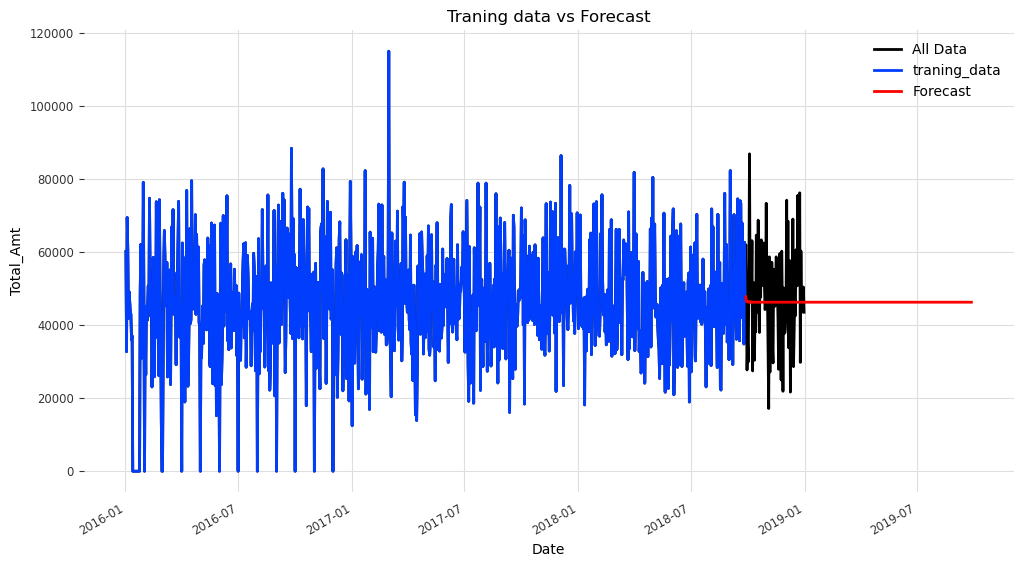

In [46]:
#plot
plt.figure(figsize=(12, 6))
y.plot(label='All Data')
y_train.plot(label='traning_data')
y_pred.plot(label='Forecast', color='red')
plt.title('Traning data vs Forecast')
plt.xlabel('Date')
plt.ylabel('Total_Amt')
plt.legend()
plt.grid(True)
plt.show()